# Deep Neural Network 

``` 
Training DNN is on multiple layers each layer with multiple neurons 
Problems of DNN training 
a. Vanishing/Exploding Gradient - Gradient grows smaller and smaller (vanishing) or larger and larger (exploding). Both of them make training of lower level layer hard. 
b. Not enough data for large networks and it is too costly to label them 
c. Trainings are extermely slow 
d. Model with millions on parameters would severly risk overfitting the training set; exspecially not enough training instances present or data is way too noisy. 


### 1. Vanishing/Exploding Gradient
``` 
- Problem was activation function (sigmoid) and weight initialization technique employed. For normal distribution mean=0 and standard deviation=1. 
- The activation function and initialization scheme, the variance of the output layer is much greater than variance of its input 
- Going forward the variance keeps increasing after each layer until activation function saturates at top level.
- And this saturation is made worse considering the fact that sigmoid/logistic function has a mean of 0.5 
- Hyperbolic tangent function has a mean of 0; thus works well in DNN

In [1]:
import numpy as np
def logit(z):
    return 1 / (1 + np.exp(-z))

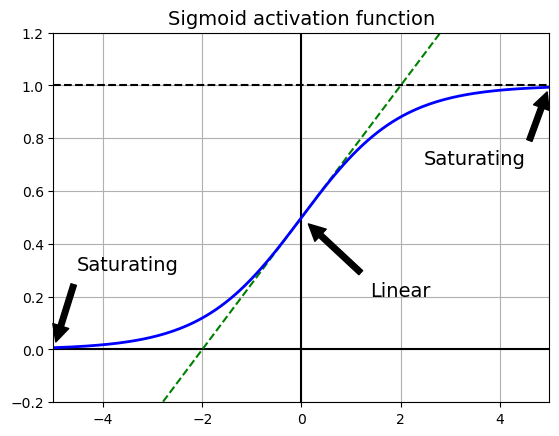

In [2]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 

# create 200 even distant points between -5 and 5 
z = np.linspace(-5, 5, 200)

# plot a line for lower bound 
plt.plot([-5, 5], [0, 0], 'k-')
# plot a line for upper bound 
plt.plot([-5, 5], [1, 1], 'k--')

# plot a line from -0.2 to 1.2 
plt.plot([0, 0], [-0.2, 1.2], 'k-')

# plot a line passing passing through function intercepted line 
plt.plot([-5, 5], [-3/4, 7/4], 'g--')

# plot sigmoid function line 
plt.plot(z, logit(z), "b-", linewidth=2)

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

``` 
- From above it is evident that Logistic function once input becomes larger (+ve or -ve); the function saturates at 0 and 1 with derivative extermly close to 0 
- when backpropagation kicks in it has virutally no gradient and propagates back through the network 
- what little graident it has gets diluted as backpropagation propogates down through the top layer, so there is nothing left for top layer.
- thus Xavier proposed we need a signal to flow properly in both directions and we dont want signal to die down. 
- Proposed a solution to have weights randomly initialized by: 
```
$fan_{avg} = (fan_{in} + fan_{out})/2$<br>
for normal distribution with mean=0 and variance $\sigma^2 = 1/fan_{avg}$ <br>
or uniform distribution between -r and +r with $r = \sqrt{3/fan_{avg}}$ <br>

<table>
<tr>
    <th>initialization</th>
    <th>activation function </th>
    <th>variance</th>
</tr>
<tr>
    <td>Glorot</td>
    <td>None, tanh, logistic, softmax</td>
    <td>1/fan_avg</td>
</tr>
<tr>
    <td>He</td>
    <td>ReLU</td>
    <td>2/fan_in</td>
</tr>
<tr>
    <td>LeCun</td>
    <td>SeLU</td>
    <td>1/fan_in</td>
</tr>
</table>
<br>
* By default Keras use Glorot initialization

In [3]:
from tensorflow import keras 
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'STFT',
 'STFTInitializer',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'stft',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [4]:
# Create a layer with 10 neurons with activation as Relu and kernel intializer as he_normal 
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

<Dense name=dense, built=False>

In [5]:
# to use 2/fan_avg for Relu activation (this is taken care by DNN)
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

<Dense name=dense_1, built=False>

### Non Saturating Activation Function 
```
- ReLU activation does not saturate for positive values. It is not perfect & suffer from dying Relu 
- During training some neurons effectively die means stop outputting anything other than 0 
- It dies because its weights get tweaked in such a way that weighted sum of inputs are negative for all instances in training set
- When this happens; it keeps outputting zeros because ReLU funciton is zero for negative input

- to solve this problem we have many variants of relu; one of them in leaky Relu 
```
$LeakyReLU_{\alpha}(z) = max(\alpha z, z)$

$\alpha$ tells how much function leaks: slope of z < 0 is 0.01 keeps neurons in coma but does not let it die 

In [6]:

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

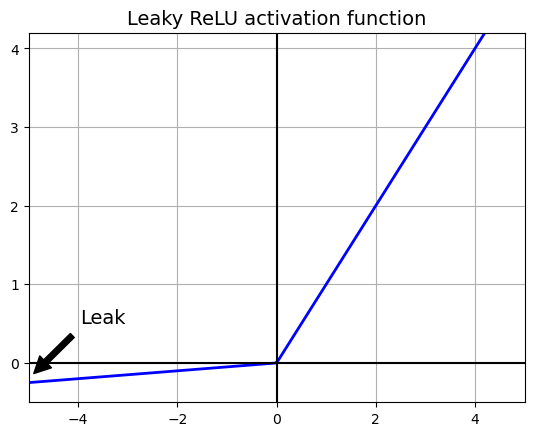

In [7]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [8]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparse_sigmoid',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

In [9]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

### training fashion mnist using leaky relu 

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
import tensorflow as tf 

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

/Users/rohitabhishek/miniconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-06-25 15:51:24.319534: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-25 15:51:24.319692: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-25 15:51:24.319699: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1750846884.320233  432503 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1750846884.320475  432503 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical 

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


2025-06-25 15:51:27.102966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4838 - loss: 1.6223 - val_accuracy: 0.7346 - val_loss: 0.8579
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7436 - loss: 0.8173 - val_accuracy: 0.7796 - val_loss: 0.6936
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7820 - loss: 0.6831 - val_accuracy: 0.7986 - val_loss: 0.6208
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8003 - loss: 0.6178 - val_accuracy: 0.8126 - val_loss: 0.5774
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8096 - loss: 0.5774 - val_accuracy: 0.8202 - val_loss: 0.5479
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8162 - loss: 0.5494 - val_accuracy: 0.8256 - val_loss: 0.5265
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8217 - loss: 0.5286 - val_accuracy: 0.8322 - val_loss: 0.5101
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8269 - loss: 0.5125 - val

### Using PReLU

```
PReLU is parameteric ReLU and alpha is authorized to be learned during training (instead of being hyperparameter). this means the value of alpha can be changed during backpropogation

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5281 - loss: 1.5583 - val_accuracy: 0.7188 - val_loss: 0.8706
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7315 - loss: 0.8319 - val_accuracy: 0.7800 - val_loss: 0.7005
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7774 - loss: 0.6943 - val_accuracy: 0.8074 - val_loss: 0.6235
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7988 - loss: 0.6255 - val_accuracy: 0.8170 - val_loss: 0.5773
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8097 - loss: 0.5825 - val_accuracy: 0.8290 - val_loss: 0.5459
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8182 - loss: 0.5528 - val_accuracy: 0.8346 - val_loss: 0.5229
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8239 - loss: 0.5306 - val_accuracy: 0.8388 - val_loss: 0.5051
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8280 - loss: 0

### ELU 
$
ELU_{\alpha}(z) = \begin {cases} \alpha(\exp(z)-1) if\space z<0 \newline
z \space if \space z>=0 \end{cases}
$

``` looks a lot like ReLU; allows unit to have an average output closer to 0 and helps to alleviate the vanishing gradient problem. The hyperparameter alpha defines the ELU function apporach when z is large negative number. 
It is usually set to 1, but you can tweak it like any other hyperparameter. 
It has non zero gradient for z < 0 which avoid dead neuron problem 
if alpha = 1, then funcion smooth everywhere, including around z=0 helps to speed up grandient descent since it does not bounce to left or right of z=0 

Issue with ELU is that is exponential in nature and therefore computation takes time. It is slower than ReLU


In [17]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

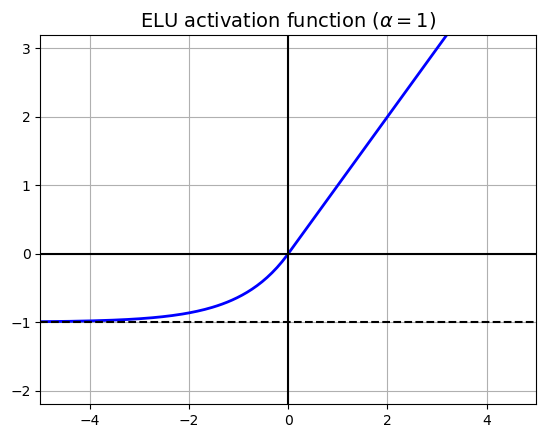

In [18]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [19]:
keras.layers.Dense(10, activation="elu")

<Dense name=dense_8, built=False>

### SELU 
This activation function was proposed in this great paper by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ1 or ℓ2 regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [20]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [21]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

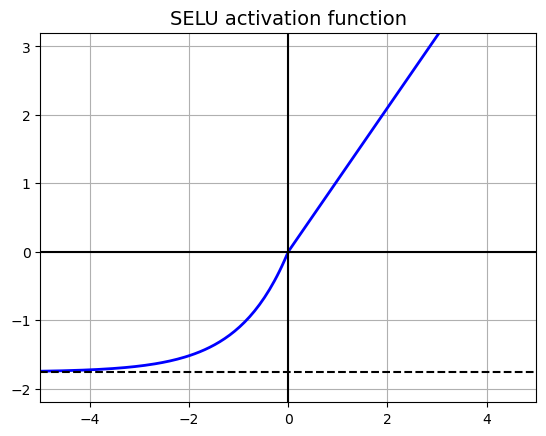

In [22]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

```
By default, the SELU hyperparameters (scale and alpha) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [23]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [24]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

<Dense name=dense_9, built=False>

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

#### using SeLU

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [28]:
# scale the input for SeLU
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=1,
                    validation_data=(X_valid_scaled, y_valid))

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 351s 204ms/step - accuracy: 0.6579 - loss: 0.9243 - val_accuracy: 0.7724 - val_loss: 0.6363


``` 
using relu with same problem

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [35]:
history = model.fit(X_train_scaled, y_train, epochs=1,
                    validation_data=(X_valid_scaled, y_valid))

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 68s 38ms/step - accuracy: 0.0012 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan


# Batch Normalization

``` 
- Batch Normalization is a technique consists of adding an operation in the model just before and after activation function of the hidden layer. This operation simply zero centers and normalizes each input then scales and shift the result using 2 new parameter vectors per layer: one for scaling and one for shifting.
- Basically it lets model to learn the optimal scale and mean of each of the layer input 
- If BN layer is added as the very first layer of neural network, you dont need to standardize and rescale the training data. It will do it for you 

In [36]:
# extra code - clear the name counters and set the random seed
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

```
As you can see first Batch normalization layer adds 784 * 4 for 
```
$\alpha, \beta, \mu, \sigma $ of which mu and sigma are not affected by backpropagation - therefore total number of non trainable params = (3136+120+400)/2 = 2368

In [ ]:
# look at thge parameters in first BN layer. Shows 2 are trainable using backpropagation and 2 are not 
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7056 - loss: 0.8634 - val_accuracy: 0.8318 - val_loss: 0.5000
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8140 - loss: 0.5401 - val_accuracy: 0.8410 - val_loss: 0.4685


```
Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a BatchNormalization layer does not need to have bias terms, since the BatchNormalization layer some as well, it would be a waste of parameters, so you can set use_bias=False when creating those layers:

In [42]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/Users/rohitabhishek/miniconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7325 - loss: 0.8252 - val_accuracy: 0.8538 - val_loss: 0.4223
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8487 - loss: 0.4367 - val_accuracy: 0.8644 - val_loss: 0.3776


# Transfer Learning

Reusing a Keras model

```
Let's split the fashion MNIST training set in two:

X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).
X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.
The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using Dense layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [52]:
labels = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels[5], labels[6]

('Sandal', 'Shirt')

In [55]:
def split_dataset(X, y): 
    # get Truth value for Sandal and Shirt
    y_5_or_6 = (y==5) | (y==6)

    # get all dresses other than sandal and shirt
    y_A = y[~y_5_or_6]

    # set values greater than 7,8,9 to 5,6,7
    y_A[y_A > 6] -= 2 

    # get all values that are sandal and shirt 
    y_B = (y[y_5_or_6] == 6).astype(np.float32)

    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

# Split training, validation and testing set 
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

# take a samll porition of training data for say 200 images for task B 
X_train_B = X_train_A[:200]
y_train_B = y_train_B[:200]

In [57]:
X_train_A.shape, X_train_B.shape, y_train_A.shape, y_train_B.shape

((43986, 28, 28), (200, 28, 28), (43986,), (200,))

In [58]:
y_train_A[:10]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4], dtype=uint8)

In [59]:
y_train_B[:10]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0.], dtype=float32)

In [77]:
# initialize the backend 
tf.random.set_seed(42)
np.random.seed(42)

In [78]:
# create sequential model 
model_A = keras.models.Sequential()

# add input flatten layer 
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))

# add hiddne layers 
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))

# create output layer 
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.summary()

/Users/rohitabhishek/miniconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,158 (1.05 MB)

 Trainable params: 276,158 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# compile the model
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [80]:
# perform model training
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.7254 - loss: 0.8579 - val_accuracy: 0.8665 - val_loss: 0.3812
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.8718 - loss: 0.3692 - val_accuracy: 0.8852 - val_loss: 0.3283
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.8865 - loss: 0.3264 - val_accuracy: 0.8936 - val_loss: 0.3043
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.8936 - loss: 0.3052 - val_accuracy: 0.9006 - val_loss: 0.2898
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.8983 - loss: 0.2912 - val_accuracy: 0.9063 - val_loss: 0.2792
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9020 - loss: 0.2806 - val_accuracy: 0.9078 - val_loss: 0.2722
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9057 - loss: 0.2721 - val_accuracy: 0.9118 - val_loss: 0.2663
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9082 -

```
92% accuracy on training set - not bad! 

In [81]:
model_A.evaluate(X_test_A, y_test_A)

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9052 - loss: 0.2741


[0.2650999426841736, 0.9077500104904175]

``` 
Looks great - No overfitting and accuracy about 90%

In [82]:
# save this model 
model_A.save('OUTPUT/Chapter11/fashion_mnist.keras')

### Using Transfer learning lets create model for B 

In [83]:
# create sequential model 
model_B = keras.models.Sequential()

# create input layer
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))

# add hidden layers 
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))

# create output layer
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [84]:
model_B.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,801 (1.05 MB)

 Trainable params: 275,801 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [95]:
history = model_B.fit(X_train_B, y_train_B, epochs=100,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8034 - loss: 0.4698 - val_accuracy: 0.6856 - val_loss: 0.5709
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8034 - loss: 0.4674 - val_accuracy: 0.6856 - val_loss: 0.5709
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8034 - loss: 0.4652 - val_accuracy: 0.6856 - val_loss: 0.5713
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8034 - loss: 0.4630 - val_accuracy: 0.6836 - val_loss: 0.5717
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8034 - loss: 0.4607 - val_accuracy: 0.6846 - val_loss: 0.5722
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8142 - loss: 0.4584 - val_accuracy: 0.6846 - val_loss: 0.5720
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8046 - loss: 0.4565 - val_accuracy: 0.6846 - val_loss: 0.5724
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8154 - loss: 0.4539 - val_accuracy: 0.6826 - val_loss:

In [96]:
# Load the A model 
model_A = keras.models.load_model('OUTPUT/Chapter11/fashion_mnist.keras')

# clone the model 
model_A_clone = keras.models.clone_model(model_A)

# set weights 
model_A_clone.set_weights(model_A.get_weights())

In [97]:
# Take all layers from the modelA excpet last layer
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])

# Add output layer for model_b_on_a
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [98]:
# set all layers except last one as non-trainable i.e. backpropogation will affect only last layer 
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

# compile the model 
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

# check the summary 
model_B_on_A.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,750 (1.05 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 275,750 (1.05 MB)

In [99]:
# tgrain the model 
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=20,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5145 - loss: 0.8407 - val_accuracy: 0.5456 - val_loss: 0.6703
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5037 - loss: 0.8278 - val_accuracy: 0.5507 - val_loss: 0.6575
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4929 - loss: 0.8158 - val_accuracy: 0.5568 - val_loss: 0.6454
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4979 - loss: 0.8047 - val_accuracy: 0.5649 - val_loss: 0.6340
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4979 - loss: 0.7943 - val_accuracy: 0.5730 - val_loss: 0.6234
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4998 - loss: 0.7848 - val_accuracy: 0.5811 - val_loss: 0.6134
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5104 - loss: 0.7759 - val_accuracy: 0.5842 - val_loss: 0.6041
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5104 - loss: 0.7677 - val_accuracy: 0.5953 - val_loss: 0.5954


In [100]:
# Now update the layers as trainable so that layers can update the weights 
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
model_B_on_A.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,801 (1.05 MB)

 Trainable params: 275,801 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

```
Notice Non-trainable paramemeters are zero now

In [103]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=100,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7324 - loss: 0.5352 - val_accuracy: 0.8235 - val_loss: 0.4592
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7374 - loss: 0.5339 - val_accuracy: 0.8235 - val_loss: 0.4593
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7588 - loss: 0.5326 - val_accuracy: 0.8215 - val_loss: 0.4596
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7588 - loss: 0.5314 - val_accuracy: 0.8205 - val_loss: 0.4599
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7588 - loss: 0.5300 - val_accuracy: 0.8185 - val_loss: 0.4603
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7588 - loss: 0.5288 - val_accuracy: 0.8174 - val_loss: 0.4605
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7588 - loss: 0.5275 - val_accuracy: 0.8164 - val_loss: 0.4609
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7588 - loss: 0.5262 - val_accuracy: 0.8144 - val_loss:

In [104]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7476 - loss: 0.4952


[0.48847678303718567, 0.7540000081062317]

# Faster Optimizers
```
There are various ways to boost the performance: 
a. Applying good initializer for connection weights 
b. Good activation 
c. Batch Normalization 
d. Pretrained model

Another way is to use good optimizer

### a. Momentum Optimization

- Imagine bowling ball rolling down the slope at smooth surface. It will start slowly and will reach the terminal velocity. 
- The same idea is for Momentum optimization
- If gradient is tiny, it will go very slowly 
- Takes previous gradient at each iteraton and it substract the local gradient from momentum vector 

$\theta \leftarrow \theta - \eta \nabla_{\theta} J(\theta)$

$m \leftarrow \beta m - \eta \nabla_{\theta} J(\theta)$

$\theta \leftarrow \theta + m$

- Performs task 10 times faster than normal SGD 
- Due to momentum the optimizer may overshoot a bit then comes back and overshoot again many times before stablizing.

In [107]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

### Netrov Accelerated Gradient (NAG)
- Measures gradient of the cost function not at local position $\theta$ but slightly ahead in the direction of momentum $\theta + \beta m$

$m \leftarrow \beta m - \eta \nabla_{\theta} J(\theta + \beta m)$

$\theta \leftarrow \theta + m $

- This small tweak works becausein general momentum vector will be pointing in the right direction (towards optimum), so slightly more accurate to gradient measured a bit farther n that direction rather than the gradient at original position,
- NAG is generally faster than Regular Momemtum Optimization 

In [108]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

### Adagrad
- Algo tries to correct the direction earlier itself. Bit more towards global optimum 
- It does so by scaling down to the gradient vector along the steepest dimension 

$s \leftarrow s + \nabla_{\theta} J(\theta) \otimes \nabla_{\theta} J(\theta)$

$\theta \leftarrow \theta - \eta \nabla_{\theta} J(\theta) \circ \sqrt{(s+\epsilon)}$

- Algo decays the learning rate but it does fater for steep dimension than dimension with gentle slope
- Called Adaptive learning rate

In [109]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

### RMSProp 
- Adagrad runs at the risk of slowing down bit too fast and never converge to the global optimum 
- Fixes this by accumulating only gradients from the most recent iteration as opposed to gradient since its begining of the training 

$s \leftarrow \beta s + (1-\beta) \nabla_{\theta} J(\theta) \otimes \nabla_{\theta} J(\theta)$

$\theta \leftarrow \theta - \eta \nabla_{\theta} J(\theta) \circ \sqrt{(s+\epsilon)}$

In [110]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

### Adam and NAdam 
- Adaptive moment estimates 
- Combines ideas for momentum optimization and RMS Prop 
- keeps track of exponentially decaying average of past gradient like momentum and keeps track of exponentially decaying average of the past sqaured gradients 

$m \leftarrow \beta_{1} m + (1-\beta) \nabla_{\theta} J(\theta)$

$s \leftarrow \beta_{2} m + (1-\beta) \nabla_{\theta} J(\theta) \otimes \nabla_{\theta} J(\theta)$

$\^m \leftarrow m \div (1-\beta_{1}^{T})$

$\^s \leftarrow s \div (1-\beta_{2}^{T})$

$\theta \leftarrow \theta + \^m  \circ \sqrt{(s+\epsilon)}$

- NAdam is Adam + Nestrov trick. And converges faster than Adam
- Adamax is a variant of Adam

In [111]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [112]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [113]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Learning Rate Scheduling 
- Good learning rate helps to converge to optimal solution faster 
- Good way to find is by training the model and increasing the learning rate from very small value then looking at learning curve starting to shoot back 
- You can then reinitialize the model and use the contant learning rate recieved from previous step 
- Instead of constant learning rate one can use different forms of learning rate which reduces making fast progress - reaching good solution faster than optimal constant learning rate

### 1. Power Scheduling 
- Set learning rate to function of iteration 

$\eta(t) = \eta_{0} \div (1 + t/s)^c$

In [114]:
# keras uses c = 1 and s = 1/decay 
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

/Users/rohitabhishek/miniconda3/envs/tensor/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [115]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7942 - loss: 0.5962 - val_accuracy: 0.8556 - val_loss: 0.4021
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8640 - loss: 0.3852 - val_accuracy: 0.8666 - val_loss: 0.3727
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8771 - loss: 0.3477 - val_accuracy: 0.8740 - val_loss: 0.3585
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8860 - loss: 0.3237 - val_accuracy: 0.8772 - val_loss: 0.3495
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8920 - loss: 0.3051 - val_accuracy: 0.8814 - val_loss: 0.3432
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8973 - loss: 0.2899 - val_accuracy: 0.8832 - val_loss: 0.3388
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9013 - loss: 0.2769 - val_accuracy: 0.8828 - val_loss: 0.3356
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9050 -

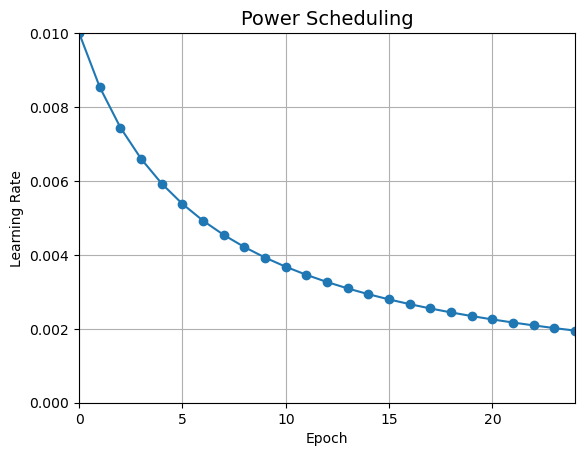

In [117]:

import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling 
- Gradually drops by 10 every s iteration 
- Power scheduing reduces learning rate more and more slowly, exponential scheduling slasjes it by a factor of 10 at every s step 

$ \eta(t) = \eta_{0} 0.1^{t/s}$ 

In [118]:

def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [119]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [120]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [121]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7525 - loss: 1.0059 - val_accuracy: 0.8012 - val_loss: 0.6705 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7962 - loss: 0.6663 - val_accuracy: 0.8054 - val_loss: 0.7203 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8110 - loss: 0.6239 - val_accuracy: 0.8278 - val_loss: 0.6741 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8225 - loss: 0.6018 - val_accuracy: 0.8344 - val_loss: 0.6729 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8438 - loss: 0.5182 - val_accuracy: 0.8422 - val_loss: 0.7294 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8548 - loss: 0.4754 - val_accuracy: 0.8198 - val_loss: 0.6585 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accura

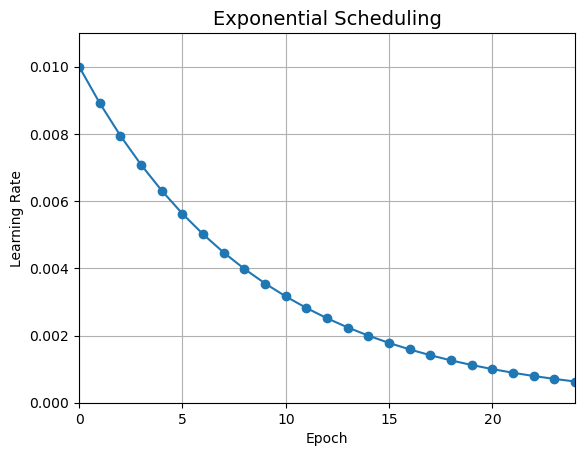

In [123]:
plt.plot(history.epoch, history.history["learning_rate"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

``` 
Scheduling funciton can take current learning rate as second argument 

In [142]:

# extra code – a little function to test an optimizer on Fashion MNIST
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [143]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [144]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self, n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = self.model.optimizer.learning_rate.numpy()
        new_learning_rate = lr * 0.1 ** (1 / self.n_steps)
        self.model.optimizer.learning_rate = new_learning_rate

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy()

In [145]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [146]:
import math

batch_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_decay])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6559 - loss: 0.9675 - val_accuracy: 0.8012 - val_loss: 0.5805 - lr: 0.0089
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8069 - loss: 0.5450 - val_accuracy: 0.8236 - val_loss: 0.5163 - lr: 0.0079
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8246 - loss: 0.4975 - val_accuracy: 0.8380 - val_loss: 0.4793 - lr: 0.0071
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8325 - loss: 0.4758 - val_accuracy: 0.8420 - val_loss: 0.4678 - lr: 0.0063
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8355 - loss: 0.4660 - val_accuracy: 0.8420 - val_loss: 0.4677 - lr: 0.0056
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8359 - loss: 0.4627 - val_accuracy: 0.8346 - val_loss: 0.4878 - lr: 0.0050
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8353 - loss: 0.4668 - val_accuracy: 0.7968 - val_loss: 0.5785 - lr:

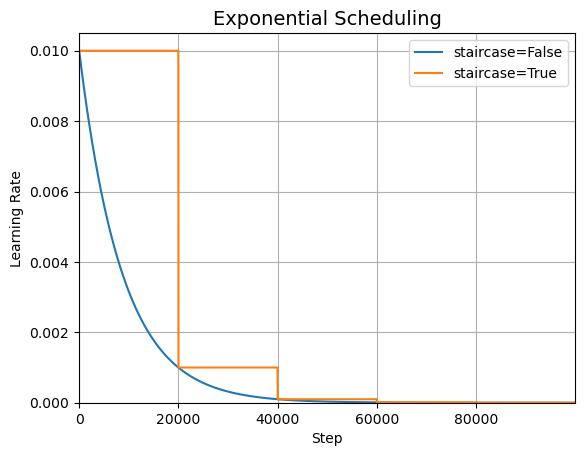

In [147]:
# extra code – this cell plots exponential scheduling

initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling 
- Use constant learning rate for a number of epochs 
- Works well in most cases however requires fiddiling around to figure out the right learning rate 


In [148]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [149]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [150]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7522 - loss: 1.0248 - val_accuracy: 0.7716 - val_loss: 0.8414 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7724 - loss: 0.7548 - val_accuracy: 0.7766 - val_loss: 0.8342 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7353 - loss: 0.9112 - val_accuracy: 0.7444 - val_loss: 0.8541 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7696 - loss: 0.8022 - val_accuracy: 0.7546 - val_loss: 0.9221 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7263 - loss: 0.9298 - val_accuracy: 0.7528 - val_loss: 0.9526 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8249 - loss: 0.6069 - val_accuracy: 0.8560 - val_loss: 0.6342 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accura

In [151]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8640 - loss: 0.7246


[0.6978650689125061, 0.8657000064849854]

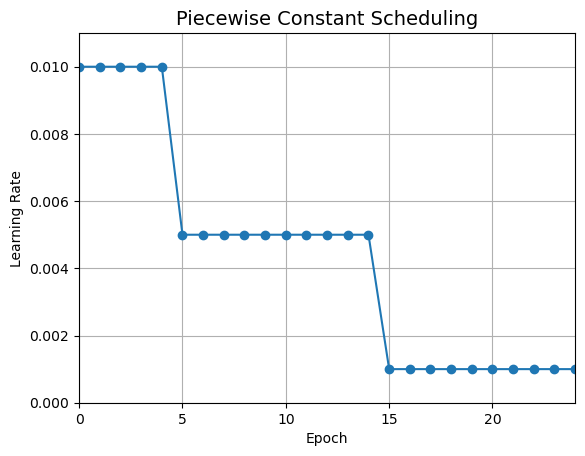

In [152]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling 
- Measure validation error at every N steps (just like early stopping)
- Reduce learning rate by $\lambda$ when error drops 


In [153]:
tf.random.set_seed(42)
np.random.seed(42)

In [154]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

/Users/rohitabhishek/miniconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7765 - loss: 0.7211 - val_accuracy: 0.8482 - val_loss: 0.5035 - learning_rate: 0.0200
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8369 - loss: 0.5129 - val_accuracy: 0.8588 - val_loss: 0.4834 - learning_rate: 0.0200
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8457 - loss: 0.5013 - val_accuracy: 0.8322 - val_loss: 0.6786 - learning_rate: 0.0200
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8499 - loss: 0.5040 - val_accuracy: 0.8364 - val_loss: 0.6282 - learning_rate: 0.0200
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8472 - loss: 0.5417 - val_accuracy: 0.8438 - val_loss: 0.5732 - learning_rate: 0.0200
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8516 - loss: 0.5320 - val_accuracy: 0.8384 - val_loss: 0.7087 - learning_rate: 0.0200
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accura

In [155]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8865 - loss: 0.6350


[0.6444452404975891, 0.8853999972343445]

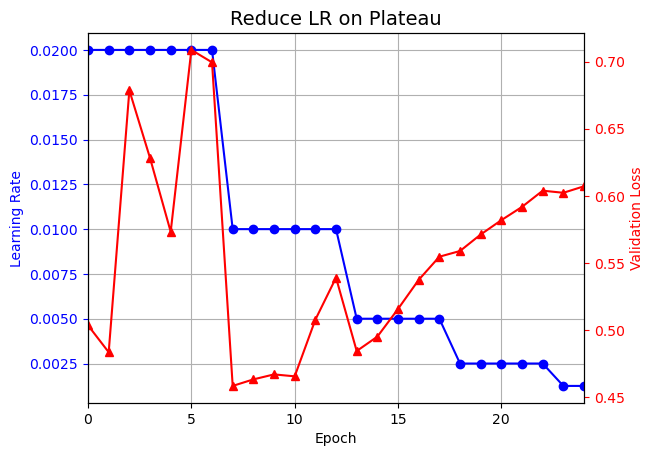

In [157]:

plt.plot(history.epoch, history.history["learning_rate"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

#### 1 Cycle Scheduling 
- linearly increase learning rate till halfway thru training and then reduce for anoter half ways

In [163]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far 
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        lr = self.model.optimizer.learning_rate.numpy()
        self.rates.append(lr)
        self.losses.append(batch_loss)
        self.model.optimizer.learning_rate = lr * self.factor

In [164]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    model.optimizer.learning_rate = min_rate
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    model.optimizer.learning_rate = init_lr
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [165]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

In [166]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3396 - loss: 81450.7109


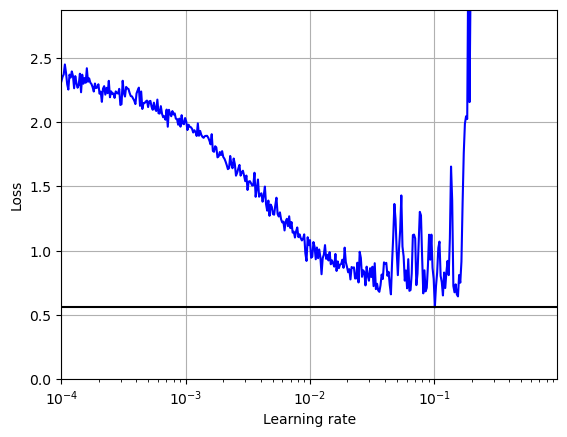

In [167]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [168]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        self.model.optimizer.learning_rate = lr

In [169]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs,
                             max_lr=0.1)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5357 - loss: 1.3030 - val_accuracy: 0.7730 - val_loss: 0.6610
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7666 - loss: 0.6500 - val_accuracy: 0.8240 - val_loss: 0.5337
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8015 - loss: 0.5573 - val_accuracy: 0.8372 - val_loss: 0.4919
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8131 - loss: 0.5270 - val_accuracy: 0.8406 - val_loss: 0.4781
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8141 - loss: 0.5269 - val_accuracy: 0.8264 - val_loss: 0.5817
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8025 - loss: 0.5877 - val_accuracy: 0.8044 - val_loss: 0.8937
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7789 - loss: 0.8262 - val_accuracy: 0.7236 - val_loss: 2.2391
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7392 - loss: 1.8101 - val_accuracy: 0.

# Avoid overfitting with Regularization

- DNN can have thousand and even millions of parameters 
- Gives an incredible amount of freedom implying it can fit huge amount of dataset 
- But this flexibility also makes prone to overfitting. This needs regularization 
- Batch Normalization was created as good mechanism it also provides good regularization 

### L1 and L2 Regularization 
- You can use l2 regularization to constrain a neural network connection weights 
- l1 regularization if you want Sparse model (with many weights equal to 0)
- l2() function returns regularizer that will be called at each step during training to compute regularization loss. This is then added to final loss

In [170]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [171]:
tf.random.set_seed(42)  # extra code – for reproducibility

In [172]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

In [173]:
# extra code – compile and train the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6928 - loss: 4.1056 - val_accuracy: 0.7992 - val_loss: 1.8988
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8071 - loss: 1.6176 - val_accuracy: 0.8098 - val_loss: 1.1435


### Dropout 
- Most popular regularization technique 
- At every training step every neuron (including input neuron but always excluding output neuron) has probablity p of being temporarily dropped out. Meaning it entirely ignored during this training step but may be active in the next step 
- Hyperparameter p is called dropout rate and typically set between 10% to 50%. Closer to 20-30% in RNN and 40-50% for CNN 
- If you observe model is overfitting after doing dropout increase dropout rate
- It helps to increase the dropout for large layers and reduce dropout for smaller ones

In [174]:
tf.random.set_seed(42)  # extra code – for reproducibility

In [175]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [176]:
# extra code – compile and train the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6332 - loss: 1.1613 - val_accuracy: 0.7686 - val_loss: 1.0545
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7075 - loss: 1.4688 - val_accuracy: 0.7146 - val_loss: 3.8466
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6098 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.0000e+00

In [177]:

model.evaluate(X_train, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0000e+00 - loss: nan


[nan, 0.0]

In [178]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0000e+00 - loss: nan


[nan, 0.0]

### MC Dropout

In [179]:
tf.random.set_seed(42)  # extra code – for reproducibility

In [180]:
y_probas = np.stack([model(X_test, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [181]:
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [182]:
y_proba[0].round(3)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [183]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [184]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.1

In [185]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

In [186]:
# extra code – shows how to convert Dropout to MCDropout in a Sequential model
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [187]:
mc_model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_1 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_2 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
# extra code – shows that the model works without retraining
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
         for sample in range(100)], axis=0).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

### Max Norm

In [189]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

In [190]:
# extra code – shows how to apply max norm to every hidden layer in a model
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7335 - loss: 0.7476 - val_accuracy: 0.8422 - val_loss: 0.4784
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8040 - loss: 0.5844 - val_accuracy: 0.8184 - val_loss: 0.7726
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7675 - loss: 0.9517 - val_accuracy: 0.7750 - val_loss: 1.5225
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7368 - loss: 1.8065 - val_accuracy: 0.7510 - val_loss: 2.2953
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7030 - loss: 3.3325 - val_accuracy: 0.6900 - val_loss: 6.1710
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6783 - loss: 6.4040 - val_accuracy: 0.5896 - val_loss: 21.0368
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5896 - loss: 28.3879 - val_accuracy: 0.6510 - val_loss: 22.9614
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6255 - loss

# Exercise
```
Q1. Is it ok to initialize all the weights to same value as long as the value is selected randomly using He initialization? 
Ans: All weights should be sampled independently; they should not have same initial value. 
Reason for sampling independently is to break the symmetery. 
Same same initialized values for all weights effectively means having one neuron per layer which will make the training slower and virutally impossible to converge at optimum solution.

Q2. Is it ok to have bias term as 0 
Ans: It is ok to have bias term as 0 or initialize like weights 

Q3. 3 Advantanges of SELU over ReLU 
Ans: a. It can take negative values so average outout of neuron in any given layer is typically closer to zero than when using Relu activation function (Relu never outputs negative value). Helps to reduce vanishing gradient problem
     b. Always has non zero derivative. Avoids dying units effect 
     c. When conditions are right: 
        i. model is sequential 
        ii. weights are initialized using LeCun initialization
        iii. inputs are standardized
        iv. No compatible layer for regularization, such as dropout or l1 regularization
        then SELU activation function ensure model is self normalized, soliving exploding/vandishing gradient problem 

Q4. Cases where you want to use SELU, Leaky Relu (and its variant), Relu, tanh, logistic, and softmax 
Ans: SELU activation function is a good default 
     If you want to have neural network as fast as possible then Leaky Relu and its variants 
     For simplicity use ReLU ; and sometimes 0 is what we desire for negative weights 
     tanh (hyperbolic tangent) can be useful in the output layer if you nee to output a number between -1 and 1. Not much used in hidden layers except for RNNs
     logistic is good for output layer when we want to predict the probablity but rarely used in hidden layers 
     softmax is good for output layer predicting probablity of mutually exclusive classes. 

Q5. If momentum is close to 1 say 0.9999 when using SGD Optimizer? 
Ans: algo is likely to pick up a lot of speed moving towards global minimum but momentum will carry it right past the minimum. It will slow down eventually and converge to global minimum eventually.

Q6. Produce sparse model 
Ans: Sparse model can be created by - 
     a. setting most of the weights to 0. Train model normally and then zero out tiny weights 
     b. Apply l1 regualarization
     c. Use tensorflow model optimization technique

Q7. Does drop out slows the training? Inferences (predictions)? What about Monte Carlo? 
Ans: Yes drop out will slow the trianing process.In general by a factor of 2. No impact on inference speed.MC  Dropout are exaclty like dropouts during trianing but is still active during inferences, so inferences are slowed in MC.
With MC you want to run inferences 10 times to get better predictions. So prediction is slowed by a factor of 10.

#### Q8. CIFAR Dataset.
a. Build DNN with 20 hidden layers of 100 neurons each. Use He intialization and ELU activation 

In [23]:
from tensorflow import keras

# Collect data 
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [24]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [25]:
# create training and validation set 
X_train, X_val = X_train_full[10000:], X_train_full[:10000]
y_train, y_val = y_train_full[10000:], y_train_full[:10000]

In [26]:
# create 

In [27]:
X_train.shape

(40000, 32, 32, 3)

In [28]:
# Lets scale the images 
X_train_scaled = X_train/255.0 
X_test_scaled = X_test/255.0
X_val_scaled = X_val/255.0

In [29]:
y_train[:10]

array([[1],
       [6],
       [6],
       [8],
       [8],
       [3],
       [4],
       [6],
       [0],
       [6]], dtype=uint8)

In [30]:
# Create lookup list 
lookup = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
len(lookup)

10

In [33]:
#  Lets check some images 
def plot_image(X, y):
    import matplotlib.pyplot as plt 
    import matplotlib as mpl 
    plt.figure(figsize=(2, 1))
    plt.imshow(X)
    plt.title(lookup[y[0]])
    plt.axis("off")

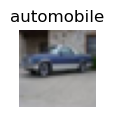

In [34]:
plot_image(X_train[0], y_train[0])

In [35]:
import tensorflow as tf 
import numpy as np 
# initialize the backend 
tf.random.set_seed(42)
np.random.seed(42)

In [37]:
# create the model 
model = keras.models.Sequential() 

# add input layer
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

# add hidden layers 
for i in range(20): 
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

/Users/rohitabhishek/miniconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


b. Use Nadam optimization and early stopping technique. Softmax activation for output layer. Search for learning rate each time you change model architecture or hyperparameter

In [38]:
# add output layer 
model.add(keras.layers.Dense(10, activation="softmax"))

In [39]:
def get_run_logdir(chapter="Chapter10", root_logdir='tensorboard_logs'):
    import time, os
    run_id = time.strftime(f"{chapter}_%Y%m%d%H%M%S")
    return os.path.join(root_logdir, run_id)

In [40]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)

# create checkpoints 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

# save best model checkpoint 
import os 
output_location = 'OUTPUT/Chapter11'
run_logdir = get_run_logdir('Ch11_CIFAR10', 'DATA/Tensorboard_Logs')
checkpoint_cb = keras.callbacks.ModelCheckpoint(os.path.join(output_location, "cifar10_exercise.keras"), save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# compile your model 
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [43]:
# Lets train the model 
model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 0.5200 - loss: 1.3477 - val_accuracy: 0.4637 - val_loss: 1.5206
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 116s 92ms/step - accuracy: 0.5284 - loss: 1.3280 - val_accuracy: 0.4626 - val_loss: 1.5182
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.5347 - loss: 1.3088 - val_accuracy: 0.4644 - val_loss: 1.5165
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 90ms/step - accuracy: 0.5383 - loss: 1.2901 - val_accuracy: 0.4648 - val_loss: 1.5183
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.5452 - loss: 1.2721 - val_accuracy: 0.4654 - val_loss: 1.5224
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 0.5511 - loss: 1.2542 - val_accuracy: 0.4677 - val_loss: 1.5273
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.5584 - loss: 1.2367 - val_accuracy: 0.4686 - val_loss: 1.5340
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - ac